## Importation des packages

In [77]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.regression.linear_model import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import scale
import operator
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

## Importation des données

In [78]:
### Données de la conso moyenne par jour et tmoy par jour
enedis_IDF=pd.read_csv("Donnees/data_one_hot_encoded_like_xgboost_6kva_IDF.csv",sep=",")
enedis_HDF=pd.read_csv("Donnees/data_one_hot_encoded_like_xgboost_6kva_HDF.csv",sep=",")
enedis_PACA=pd.read_csv("Donnees/data_one_hot_encoded_like_xgboost_6kva_PACA.csv",sep=",")

### On enlève les valeurs manquantes

enedis_IDF.dropna(inplace=True)
enedis_PACA.dropna(inplace=True)
enedis_HDF.dropna(inplace=True)

## Contexte

Dans l'ensemble du projet nous comparerons trois régions différentes : 

- Hauts de France (HDF),
- Ile de France (IDF),
- et Provence Alpes Côtes d'Azur (PACA)

## Corrélation entre consommation moyenne et température

#### Ile de France

Text(0.5, 1.0, "Consommation moyenne de l'énergie soutirée en fonction de la température pour l'IDF")

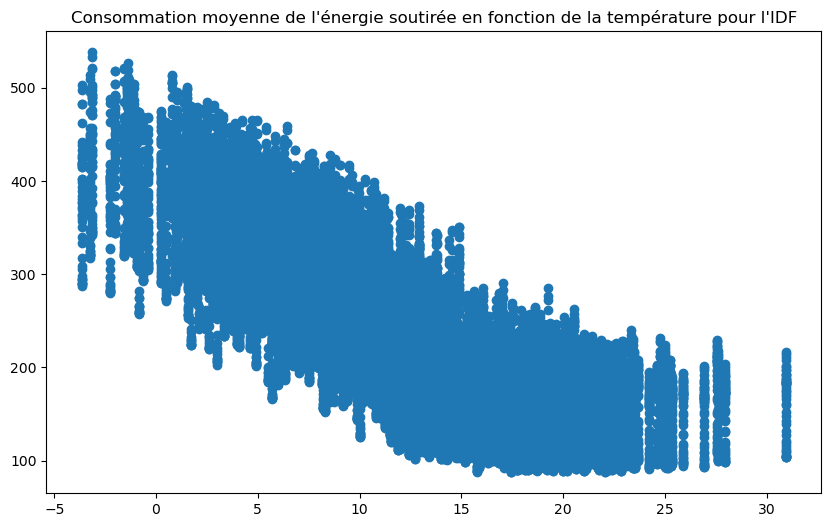

In [4]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.scatter(enedis_IDF["tmoy"],enedis_IDF["conso_totale_moyenne"])
plt.title("Consommation moyenne de l'énergie soutirée en fonction de la température pour l'IDF")

#### PACA

Text(0.5, 1.0, "Consommation moyenne de l'énergie soutirée en fonction de la température pour PACA")

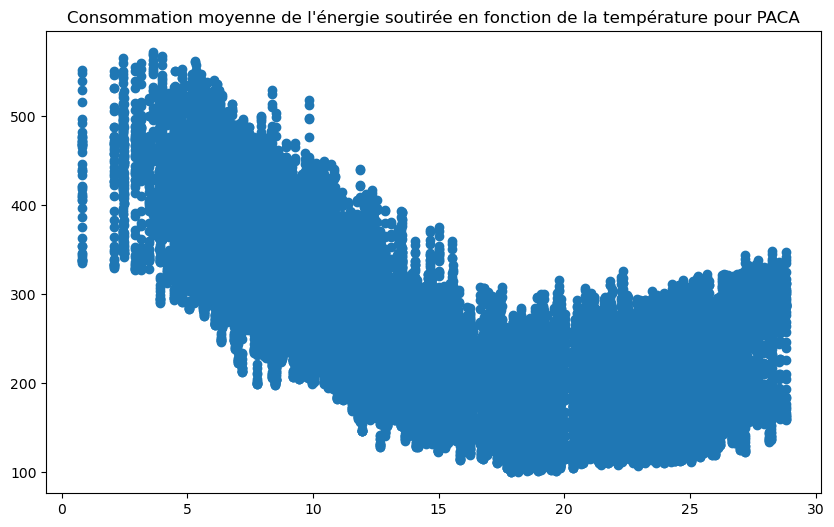

In [5]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.scatter(enedis_PACA["tmoy"],enedis_PACA["conso_totale_moyenne"])
plt.title("Consommation moyenne de l'énergie soutirée en fonction de la température pour PACA")

On voit ici que la consommation moyenne augmente à partir de 20°C.

#### Hauts de France

Text(0.5, 1.0, "Consommation moyenne de l'énergie soutirée par contrat en fonction de la température HDF")

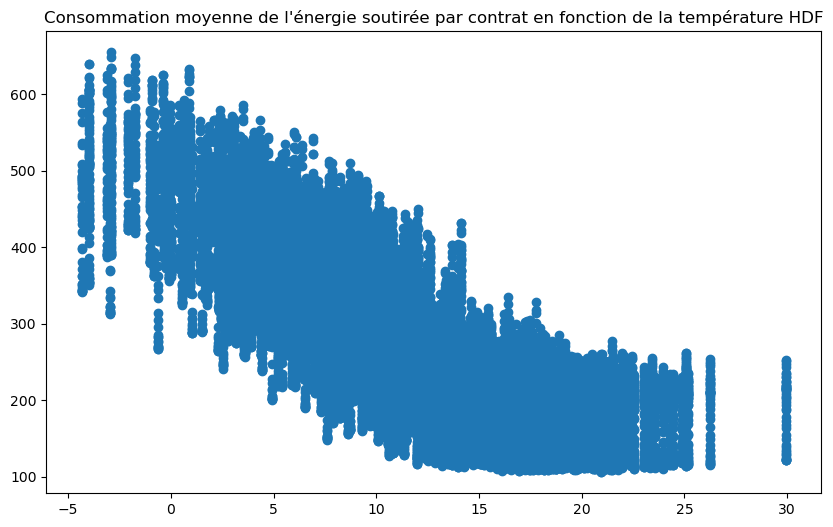

In [6]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.scatter(enedis_HDF["tmoy"],enedis_HDF["conso_totale_moyenne"])
plt.title("Consommation moyenne de l'énergie soutirée par contrat en fonction de la température HDF")

## Regression linéaire de la conso moyenne en fonction de la tempérautre

Objectif : Prédiction du de la consommation moyenne soutirée par journée en fonction de la température de la journée sur une région particulière

### Standardisation des données

In [115]:
enedis_IDF["tmoy_scaled"]=scale(enedis_IDF["tmoy"])
enedis_HDF["tmoy_scaled"]=scale(enedis_HDF["tmoy"])
enedis_PACA["tmoy_scaled"]=scale(enedis_PACA["tmoy"])

In [92]:
enedis_PACA

,Horodate,tmoy,conso_totale_moyenne,hour,dayofweek,month,dayofyear,dayofmonth,minute,indice,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2022-12-31 23:30:00,11.69,238.243608,23,5,12,365,31,30,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2022-12-31 23:00:00,11.69,247.714720,23,5,12,365,31,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2022-12-31 22:30:00,11.69,259.513479,22,5,12,365,31,30,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2022-12-31 22:00:00,11.69,270.009868,22,5,12,365,31,0,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2022-12-31 21:30:00,11.69,284.872089,21,5,12,365,31,30,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35035,2021-01-01 02:00:00,5.32,338.888442,2,4,1,1,1,0,35035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35036,2021-01-01 01:30:00,5.32,344.587789,1,4,1,1,1,30,35036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35037,2021-01-01 01:00:00,5.32,353.783601,1,4,1,1,1,0,35037,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35038,2021-01-01 00:30:00,5.32,365.971955,0,4,1,1,1,30,35038,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Création de nos échantillons

In [103]:
def decoupe (bdd_region):
    
    X =bdd_region[["tmoy"] ]
    Y= bdd_region[["conso_totale_moyenne"]]
    
    # On coupe les echantillons en 
    #Apprentissage : 2021 Test : 2022
    

    split_date = "2022-01-01 00:00:00"
    df_train = bdd_region.loc[bdd_region["Horodate"]< split_date].copy()
    df_test = bdd_region.loc[bdd_region["Horodate"]> split_date].copy()

    

    X_train = df_train[["tmoy"] ]
    Y_train = df_train[["conso_totale_moyenne"]]

    X_test = df_test[["tmoy"] ]
    Y_test = df_test[["conso_totale_moyenne"]]
    return (X,Y, X_train, X_test, Y_train, Y_test)

In [104]:
## Création des échantillons d'apprentissages et de tests

X_IDF,Y_IDF , X_train_IDF, X_test_IDF, Y_train_IDF, Y_test_IDF =decoupe(enedis_IDF)
X_PACA,Y_PACA , X_train_PACA, X_test_PACA, Y_train_PACA, Y_test_PACA =decoupe(enedis_PACA)
X_HDF,Y_HDF , X_train_HDF, X_test_HDF, Y_train_HDF, Y_test_HDF =decoupe(enedis_HDF)

In [105]:
X_train_HDF

,tmoy
17520,11.67
17521,11.67
17522,11.67
17523,11.67
17524,11.67
...,...
35035,1.64
35036,1.64
35037,1.64
35038,1.64


### Régression sur l'échantillon d'apprentissage

In [99]:
X_IDF.loc[X_IDF['tmoy'].isna(),:]


,tmoy


On utilise ici le package sklearn pour effectuer nos régressions.

In [110]:
## Création de la fonction de régression utilisant sklearn 

def reg_sklearn(X_train,Y_train,X_test,Y_test,df_region,region):
    
    model = LinearRegression()
    results=model.fit(X_train,Y_train)

    coeff=results.coef_[0][0]
    intercept=results.intercept_[0]

    R2=model.score(X_train,Y_train)

    Y = df_region["conso_totale_moyenne"].to_numpy()
  
    Y_predicted = model.predict(X_test)

    Y_test["prevision"]=Y_predicted
    # Évaluation du modèle
    r2 = r2_score(Y_test["conso_totale_moyenne"], Y_test["prevision"])
    # Affichage des valeurs
    print("Pente : " ,coeff)
    print("Ordonnée à l'origine : ", intercept)
    print('Score R2 : ', r2)

    # Calculate the mean square errors
    MSE = mean_squared_error(y_true=Y_test["conso_totale_moyenne"],y_pred=Y_test["prevision"])
    MSE_combine = "le MSE est de " + str(MSE)
    print(MSE_combine)
    # Calculate the mean absolute errors
    MAE = mean_absolute_error(y_true=Y_test["conso_totale_moyenne"],y_pred=Y_test["prevision"])
    MAE_combine = "le MAE est de " + str(MAE)
    print(MAE_combine)

    # Tracée des valeurs
    # Points de données
    plt.figure(figsize=(20, 8))
    plt.scatter(df_region["tmoy"], Y, s=10)
    plt.xlabel('Température moyenne standardisée')
    plt.ylabel("Consommation d'energie moyenne par pt de soutirageen Watt")
    plt.title("Regression linéaire de la conso moyenne sur la température pour la région "+"IDF")
    # Valeurs prédites
    plt.scatter(X_test, Y_test["prevision"], color='r')
    plt.show()
    

    return (coeff,R2,intercept)

Pente :  -10.947976291297358
Ordonnée à l'origine :  371.4678323338786
Score R2 :  0.6279578795494947
le MSE est de 2728.5112377894875


NameError: name 'region' is not defined

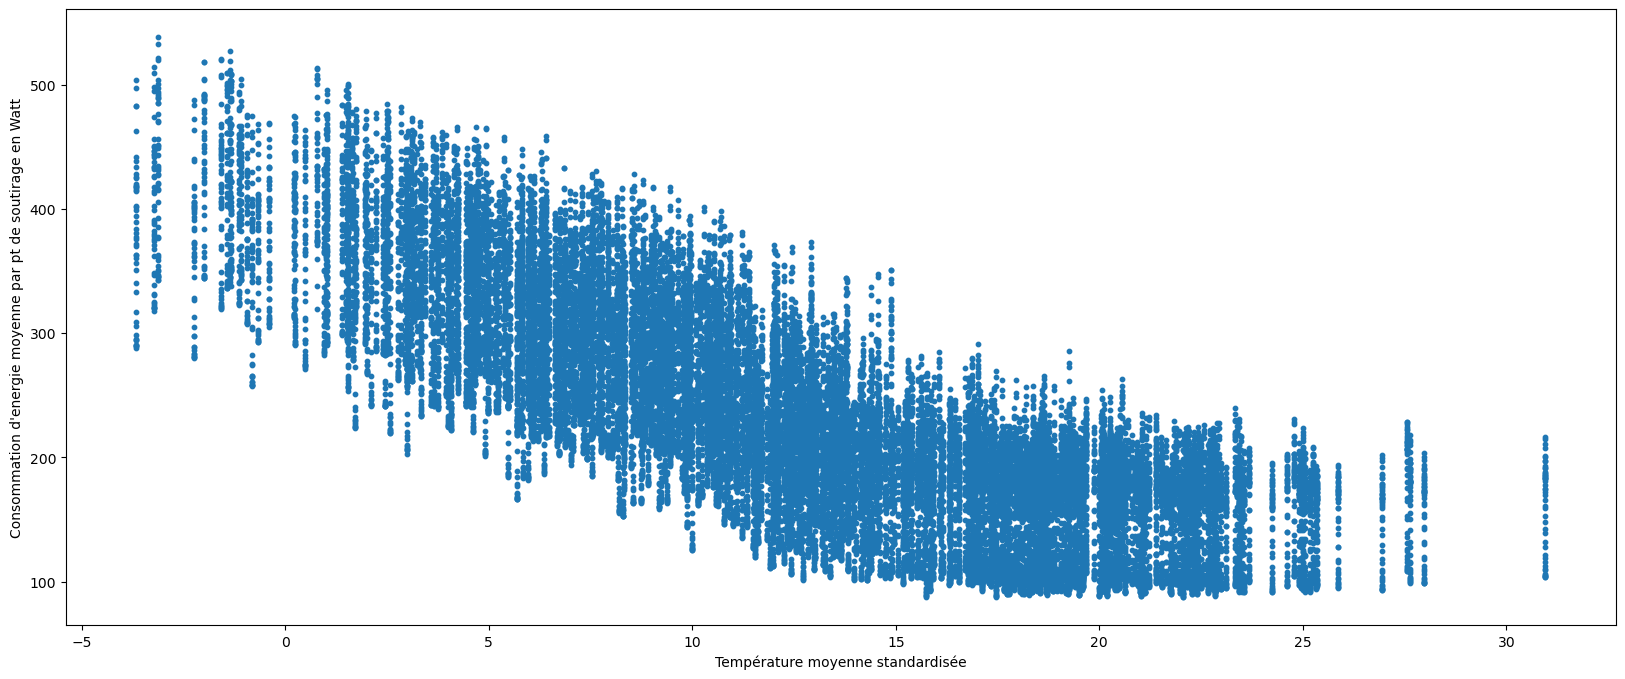

In [109]:
model = LinearRegression()
results=model.fit(X_train_IDF,Y_train_IDF)

coeff=results.coef_[0][0]
intercept=results.intercept_[0]

R2=model.score(X_train_IDF,Y_train_IDF)

Y_predicted = model.predict(X_test_IDF)

Y_test_IDF["prevision"]=Y_predicted
# Évaluation du modèle
r2 = r2_score(Y_test_IDF["conso_totale_moyenne"], Y_test_IDF["prevision"])
# Affichage des valeurs
print("Pente : " ,coeff)
print("Ordonnée à l'origine : ", intercept)
print('Score R2 : ', r2)
# Calculate the mean square errors
MSE = mean_squared_error(y_true=Y_test_IDF["conso_totale_moyenne"],y_pred=Y_test_IDF["prevision"])
MSE_combine = "le MSE est de " + str(MSE)
print(MSE_combine)



# Tracée des valeurs
# Points de données
plt.figure(figsize=(20, 8))
plt.scatter(enedis_IDF["tmoy"], Y_IDF, s=10)
plt.xlabel('Température moyenne standardisée')
plt.ylabel("Consommation d'energie moyenne par pt de soutirage en Watt")
plt.title("Regression linéaire de la consommation totale moyenne sur la température pour la région "+ region)
# Valeurs prédites
plt.scatter(X_test_IDF, Y_test_IDF["prevision"], color='r')
plt.show()

Pente :  -10.947976291297358
Ordonnée à l'origine :  371.4678323338786
Score R2 :  0.6279578795494947
le MSE est de 2728.5112377894875
le MAE est de 42.855493007819454


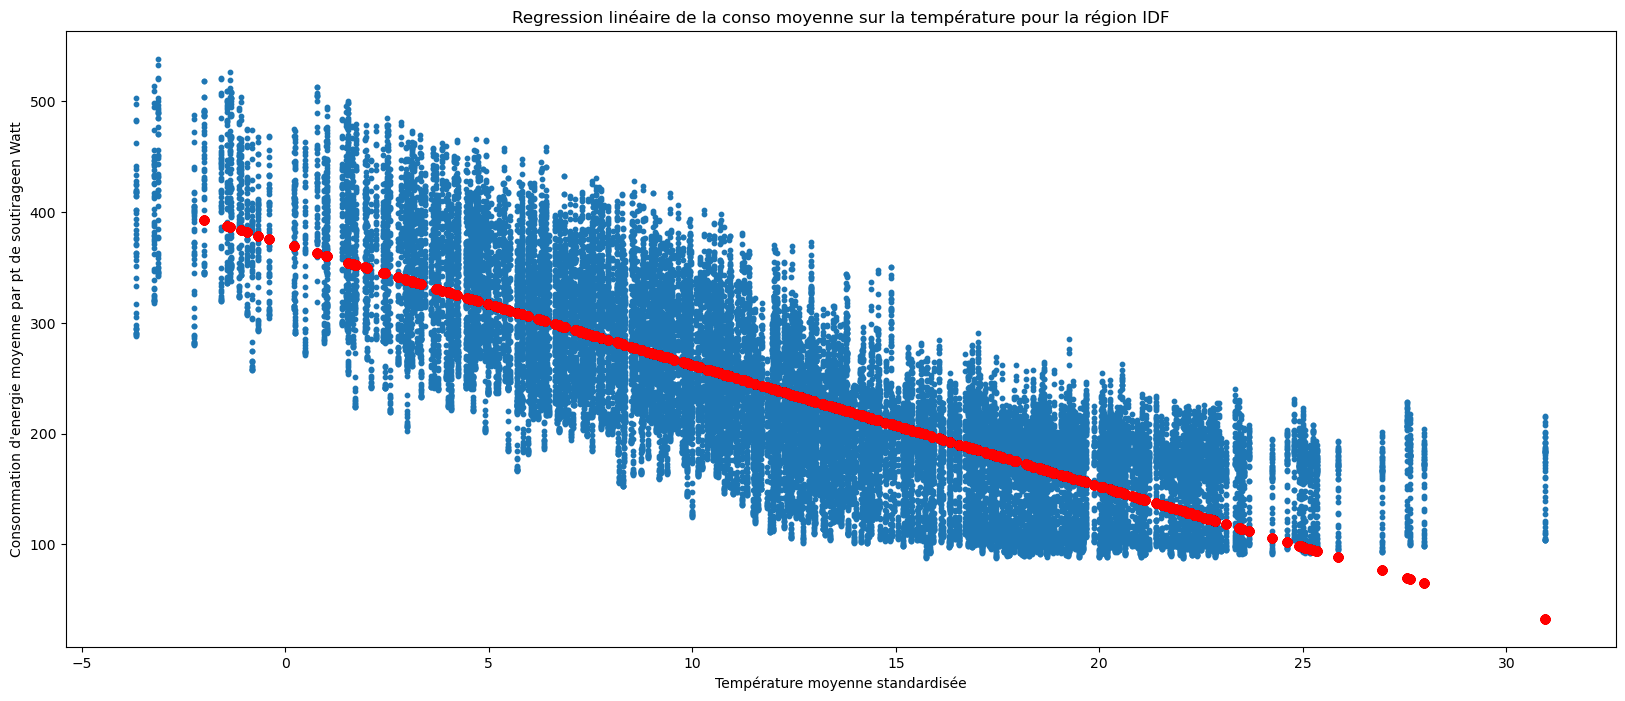

In [112]:
coeff_reg_IDF,R2_IDF,intercept_reg_IDF = reg_sklearn(X_train_IDF,Y_train_IDF,X_test_IDF,Y_test_IDF,enedis_IDF,"IDF")


Pente :  -9.714851116576439
Ordonnée à l'origine :  405.6936111227361
Score R2 :  0.35421657077789837
le MSE est de 5063.3286600244355
le MAE est de 57.43960647690741


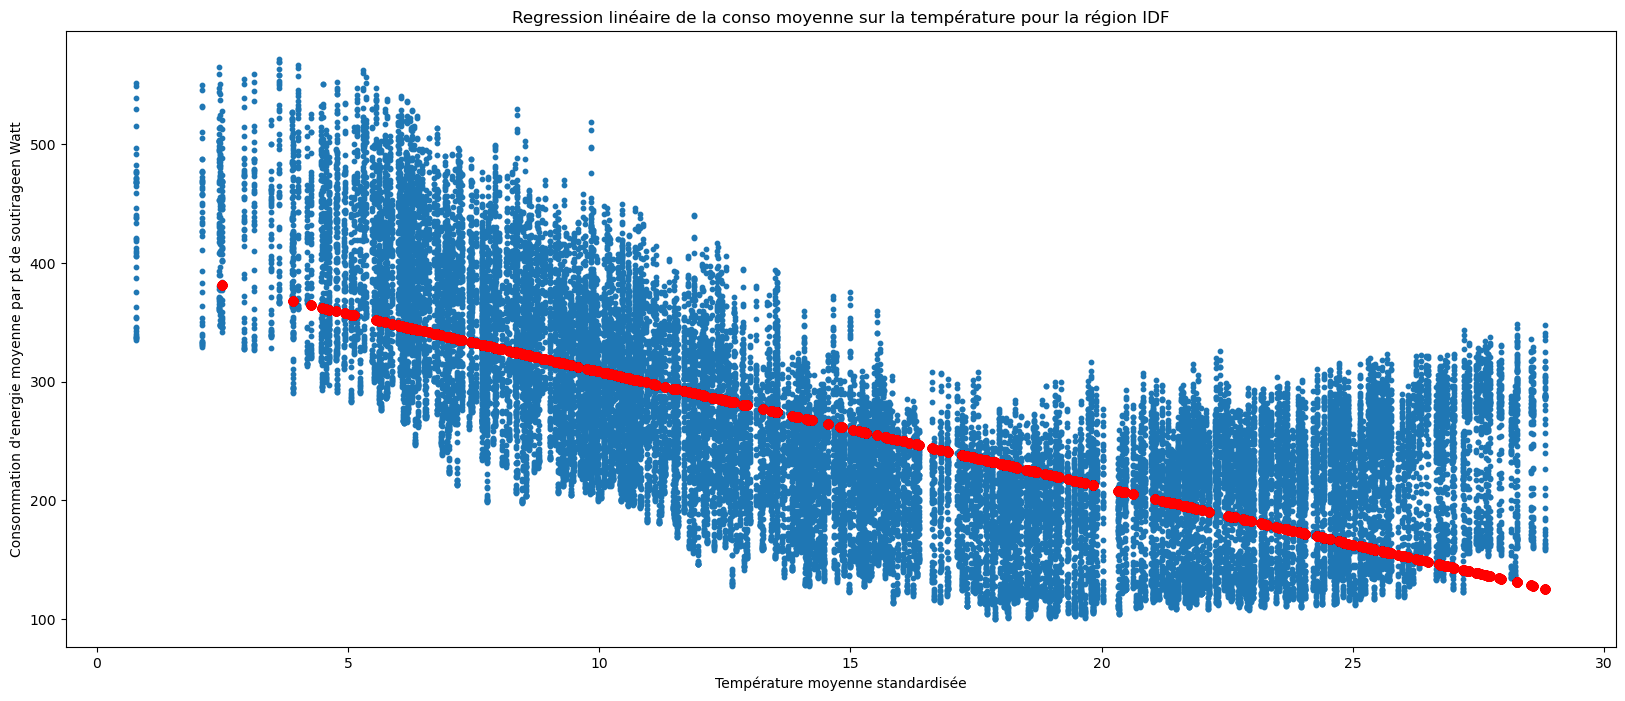

In [113]:
coeff_reg_PACA,R2_PACA,intercept_reg_PACA = reg_sklearn(X_train_PACA,Y_train_PACA,X_test_PACA,Y_test_PACA,enedis_PACA,"PACA")


Pente :  -14.106136661357668
Ordonnée à l'origine :  436.1073029230299
Score R2 :  0.6185019627697261
le MSE est de 4226.3114903186815
le MAE est de 52.9279035409638


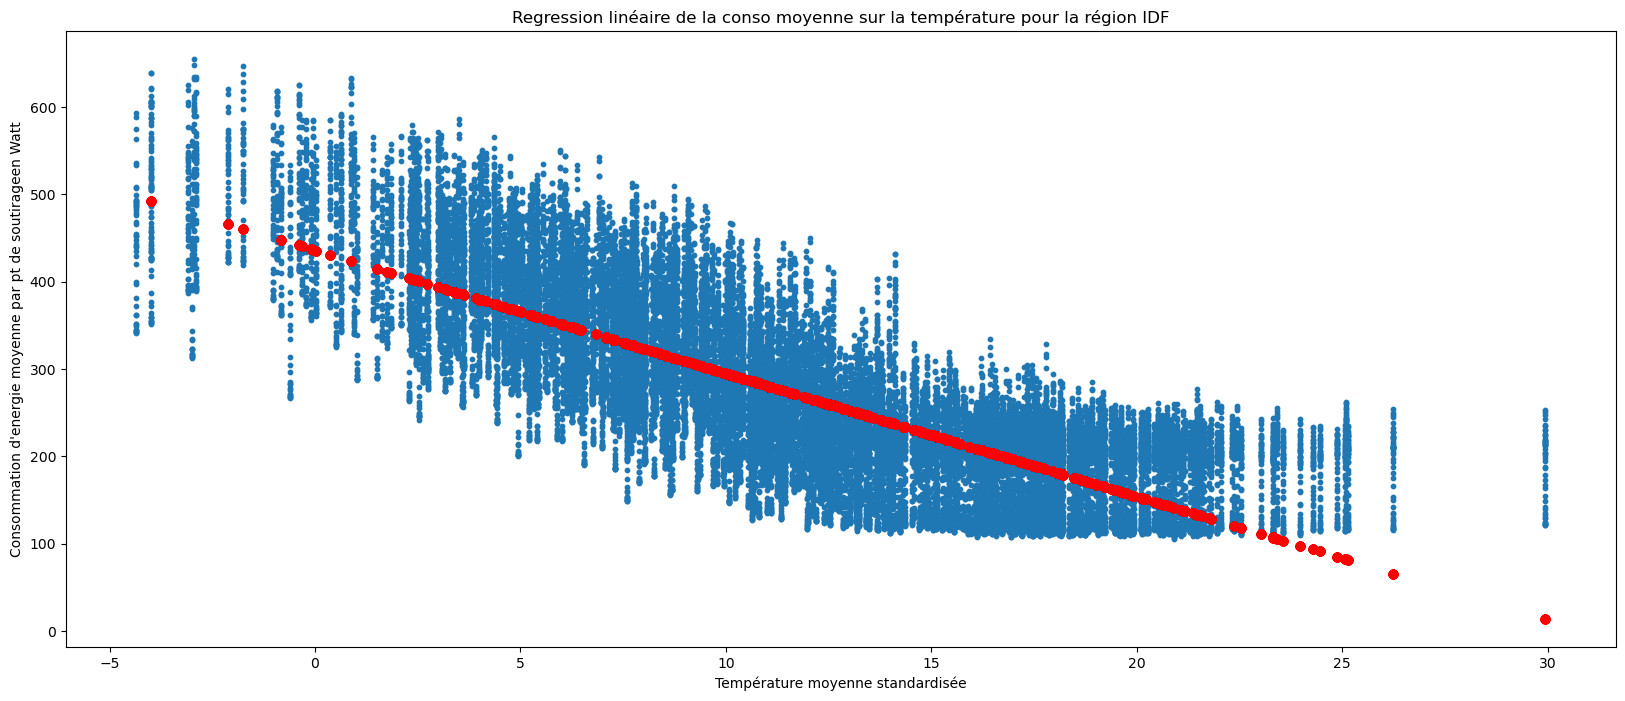

In [114]:
coeff_reg_HDF,R2_HDF,intercept_reg_HDF = reg_sklearn(X_train_HDF,Y_train_HDF,X_test_HDF,Y_test_HDF,enedis_HDF,"HDF")

### Classification des R2 sur l'échantillon de test

In [61]:
liste_R2 = [R2_IDF,R2_PACA,R2_HDF]
liste_region = ['Île-de-France',"Provence-Alpes-Côte d'Azur",'Hauts-de-France']
d={'liste_region':liste_region,"R2":liste_R2}
R2_regressions_lineaire = pd.DataFrame(d)
R2_regressions_lineaire.sort_values("R2",ascending=False,inplace=True)
R2_regressions_lineaire

,liste_region,R2
0,Île-de-France,0.631467
2,Hauts-de-France,0.623478
1,Provence-Alpes-Côte d'Azur,0.439669


### Classification des coefficients et intervalles de confiance

In [62]:
liste_coeff = [coeff_reg_IDF,coeff_reg_PACA,coeff_reg_HDF]
liste_region = ['Île-de-France',"Provence-Alpes-Côte d'Azur",'Hauts-de-France']
d={'liste_region':liste_region,"coefficient régression":liste_coeff}

coeff_apprentissage = pd.DataFrame(d)
coeff_apprentissage.sort_values("coefficient régression",ascending=False,inplace=True)
coeff_apprentissage

,liste_region,coefficient régression
1,Provence-Alpes-Côte d'Azur,-59.439361
0,Île-de-France,-69.111290
2,Hauts-de-France,-83.079740


In [14]:
conf_int = pd.concat([conf_int_IDF,conf_int_PACA,conf_int_HDF])
conf_int.columns=["conf_int_down","conf_int_up"]
conf_int=conf_int.reset_index().drop(columns="index")
result_reg = coeff_apprentissage.copy()
result_reg["conf_int_down"]= conf_int["conf_int_down"]
result_reg["conf_int_up"]= conf_int["conf_int_up"]
result_reg

NameError: name 'conf_int_IDF' is not defined

### Conclusion

Interprétation :

Les R2 sont entre 0.37 et 0.4.

On suppose que l'effet est causal et que l'on peut interpréter causalement les coefficients.

On voit que les coefficients sont négatifs. Ce qui semble cohérent car plus la température augmente plus la consommation moyenne doit diminuer. 

On pourra interpréter comme :

Lorsque la température augmente d'1 unité, la consommation moyenne par point de soutirage diminue de 527,8 wh pour l'Ile-de-France.

Problème : 
Ici on remarque que l'on ne prend pas en compte l'effet seuil qui se trouve aux environs de 0/1. Il correspond à ___

Solution : 
Le courbure de la courbe laisse penser qu'une régression polynomiale serait plus efficace pour prédire nos données.

## Régression polynomiale

### Recherche de la fonction polynomial pertinente


In [63]:
## Création de la fonction de visualisation de polynome de différents degrés
def polynomial_plot(feature, label,region):
  # Create 1D array. We can use 'squeeze' function to reduce the 2D array to 1D array
  x_coordinates = np.squeeze(feature)
  y_coordinates = np.squeeze(label)
  # Contruct polynomial function
  quadratic_func2 = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 2))
  quadratic_func3 = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 3))
  quadratic_func4 = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 4))
  quadratic_func5 = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 5))
  quadratic_func6 = np.poly1d(np.polyfit(x_coordinates, y_coordinates, 6))
  # Generate evenly spaced values
  values = np.linspace(x_coordinates.min(), x_coordinates.max(), len(x_coordinates))
  plt.scatter(x_coordinates,y_coordinates, color='blue')  
  #plt.plot(values, linear_func(values), color='red', label='Fonction linéaire')
  plt.plot(values, quadratic_func2(values), color='black', label='Fonction Quadratique (degrés 2)')
  plt.plot(values, quadratic_func3(values), color='orange', label='Fonction Quadratique (degrés 3)')
  plt.plot(values, quadratic_func4(values), color='red', label='Fonction Quadratique (degrés 4)')
  plt.plot(values, quadratic_func5(values), color='cyan', label='Fonction Quadratique (degrés 5)')
  plt.plot(values, quadratic_func6(values), color='green', label='Fonction Quadratique (degrés 6)')
  plt.xlabel('température moyenne standardisée ')
  plt.ylabel('Conso moyenne (wh) ')
  plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
  plt.legend()
  plt.title("Fonction Quadratique sur base d'apprentissage pour la région "+region)
  plt.show()  

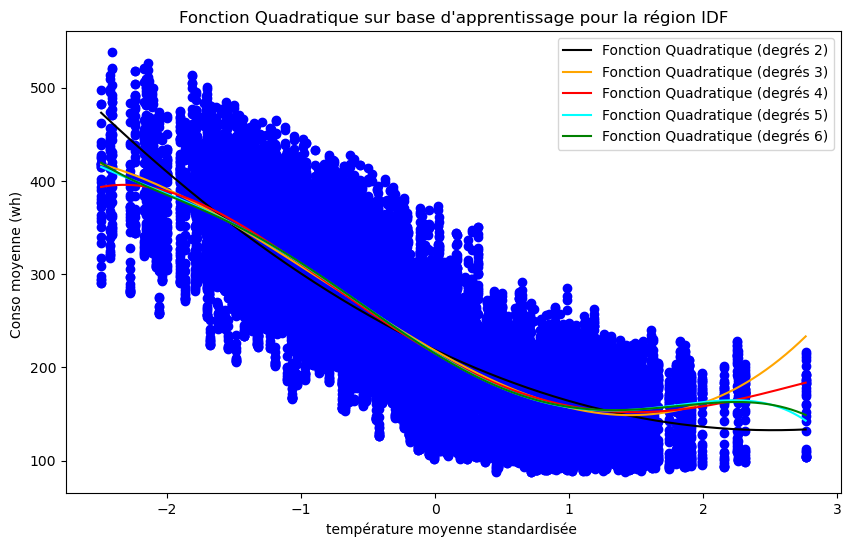

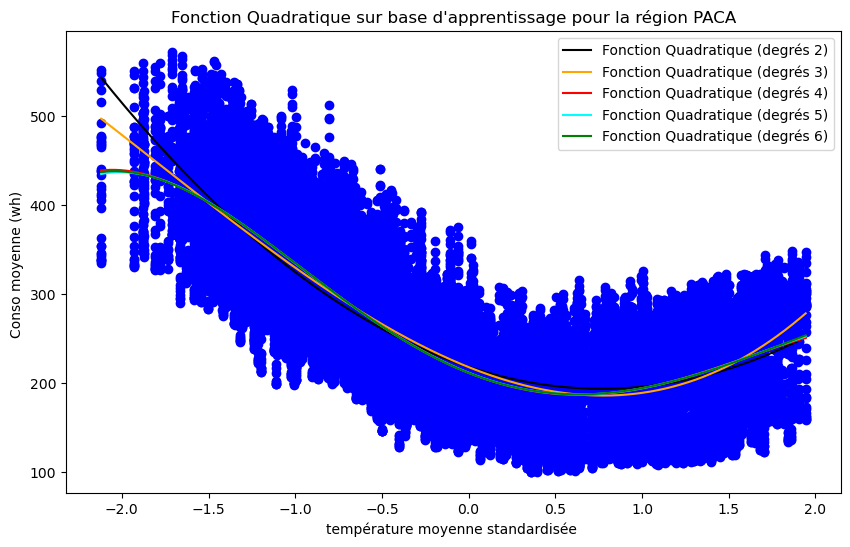

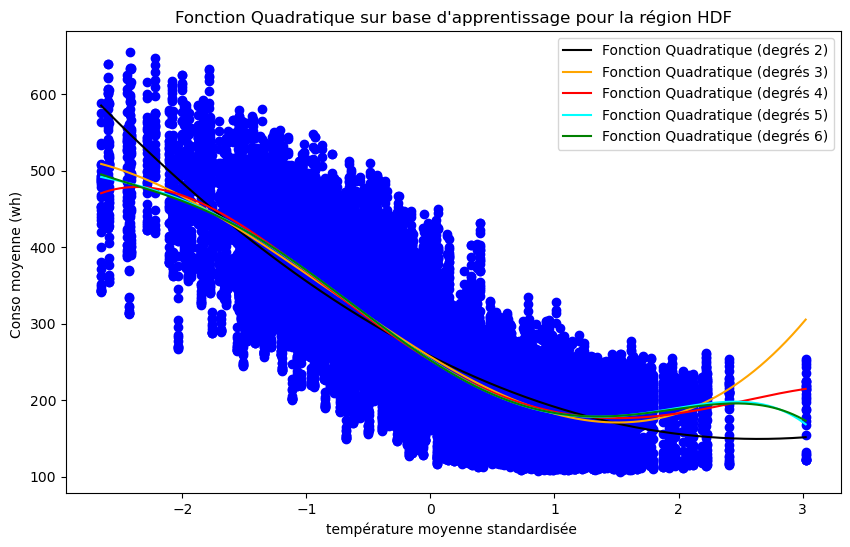

In [64]:
## Affichage des résultats des régressions polynomiales pour chaque régions 
plot_poly_IDF = polynomial_plot(X_train_IDF,Y_train_IDF,"IDF")
plot_poly_PACA = polynomial_plot(X_train_PACA,Y_train_PACA,"PACA")
plot_poly_HDF = polynomial_plot(X_train_HDF,Y_train_HDF,"HDF")

In [ ]:
plot_poly_PDL = polynomial_plot(X_train_PDL,Y_train_PDL,"PDL")
plot_poly_Normandie = polynomial_plot(X_train_Normandie,Y_train_Normandie,"Normandie")
plot_poly_Occitanie = polynomial_plot(X_train_Occitanie,Y_train_Occitanie,"Occitanie")
plot_poly_Bretagne = polynomial_plot(X_train_Bretagne,Y_train_Bretagne,"Bretagne")
plot_poly_NA = polynomial_plot(X_train_NA,Y_train_NA,'Nouvelle Aquitaine')
plot_poly_GE = polynomial_plot(X_train_GE,Y_train_GE,"Grand Est")
plot_poly_BFC = polynomial_plot(X_train_BFC,Y_train_BFC,"BFC")
plot_poly_ARA = polynomial_plot(X_train_ARA,Y_train_ARA,"ARA")
plot_poly_CVL = polynomial_plot(X_train_CVL,Y_train_CVL,"CVL")

Interprétation :

Graphiquement, la fonction qui semble le mieux fit aux données est celle de degré 2. Afin, de trouver précisemment le degré on calcule les R2.

In [65]:
def reg_poly(n,X_train,Y_train):
    psi = PolynomialFeatures(n,include_bias=False).fit_transform
    return LinearRegression().fit(psi(X_train),Y_train), psi

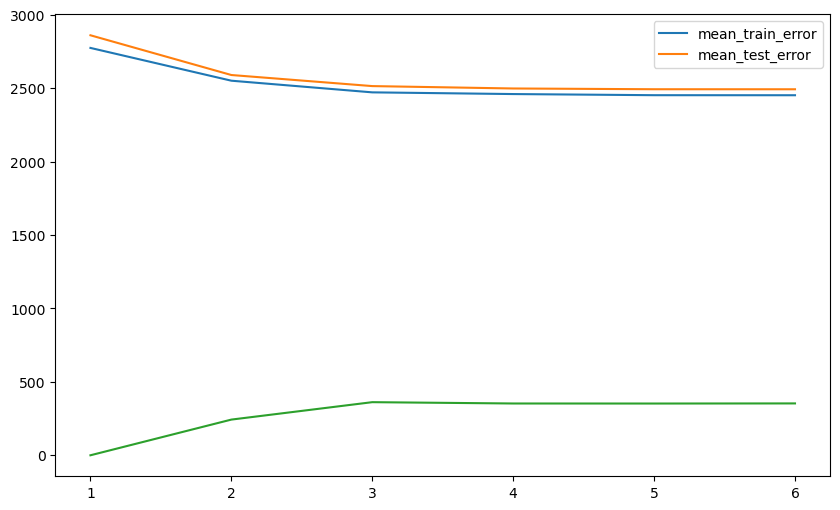

[conso_totale_moyenne    2860.837841
 prevision                  0.000000
 dtype: float64,
 conso_totale_moyenne    2590.159100
 prevision                243.079981
 dtype: float64,
 conso_totale_moyenne    2514.705432
 prevision                361.750035
 dtype: float64,
 conso_totale_moyenne    2498.420638
 prevision                352.755213
 dtype: float64,
 conso_totale_moyenne    2493.264778
 prevision                352.464858
 dtype: float64,
 conso_totale_moyenne    2493.026856
 prevision                353.236945
 dtype: float64]

In [66]:
mean_train_error = []
mean_test_error = []
m=np.size(X_train_IDF)
m_test=np.size(X_test_IDF)
n_max = 6
for n in range(1,n_max+1):
    f, psi = reg_poly(n,X_train_IDF,Y_train_IDF)
    mean_train_error.append(((f.predict(psi(X_train_IDF))-Y_train_IDF)**2).sum()/m)
    mean_test_error.append(((f.predict(psi(X_test_IDF))-Y_test_IDF)**2).sum()/m_test)
plt.plot(range(1,n_max+1),mean_train_error)
plt.plot(range(1,n_max+1),mean_test_error)
plt.legend(["mean_train_error","mean_test_error"])
plt.show()
mean_test_error

La meilleure régression est celle avec la fonction ___

### Classification des R2 pour une regression polynomiale de degré

In [67]:
def reg_sk_poly(n_maximum,X_train,X_test,Y_train,Y_test):
    mean_train_error = []
    mean_test_error = []
    m=np.size(X_train)
    m_test=np.size(X_test)
    n_max = 6
    for n in range(1,n_max+1):
        f, psi = reg_poly(n,X_train,Y_train)
        mean_train_error.append(((f.predict(psi(X_train))-Y_train)**2).sum()/m)
        mean_test_error.append(((f.predict(psi(X_test))-Y_test)**2).sum()/m_test)
    plt.plot(range(1,n_max+1),mean_train_error)
    plt.plot(range(1,n_max+1),mean_test_error)
    plt.legend(["mean_train_error","mean_test_error"])
    plt.show()


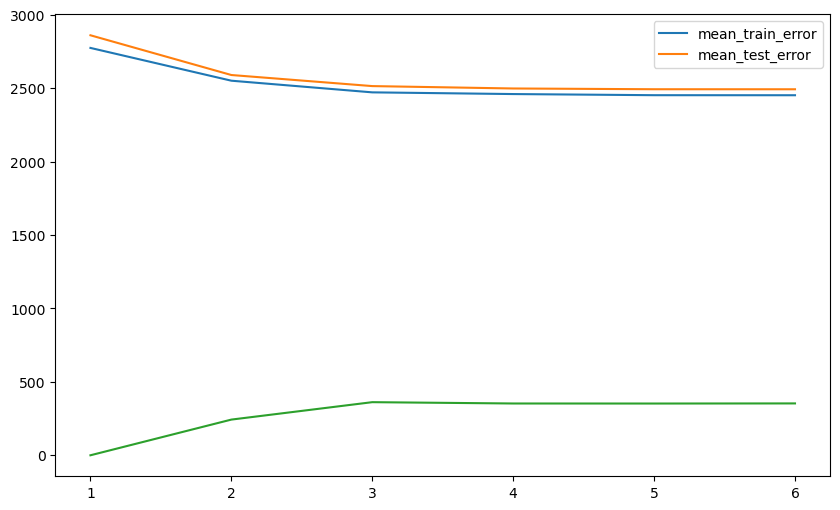

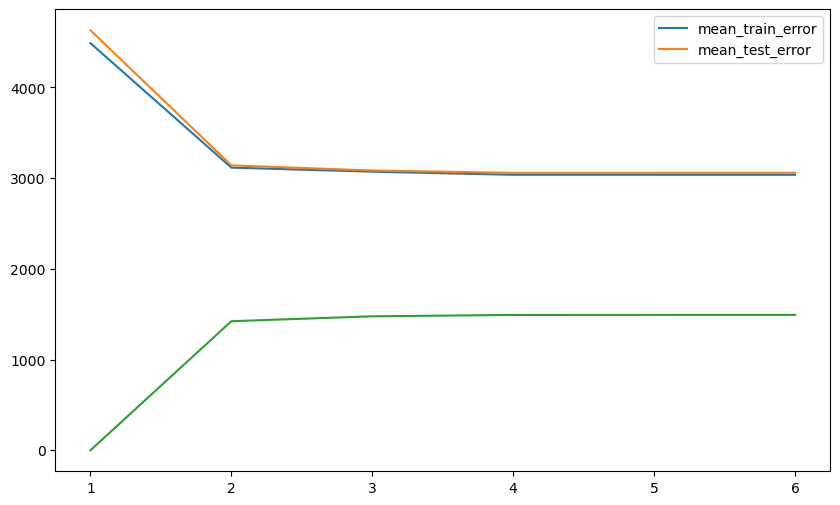

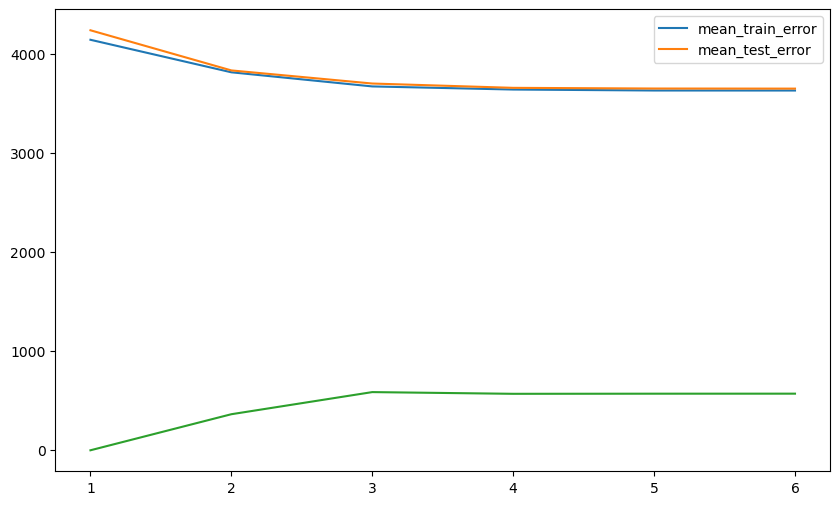

In [68]:
R2_prev_poly_IDF = reg_sk_poly(4,X_train_IDF,X_test_IDF,Y_train_IDF,Y_test_IDF)
R2_prev_poly_PACA = reg_sk_poly(4,X_train_PACA,X_test_PACA,Y_train_PACA,Y_test_PACA)
R2_prev_poly_HDF = reg_sk_poly(4,X_train_HDF,X_test_HDF,Y_train_HDF,Y_test_HDF)

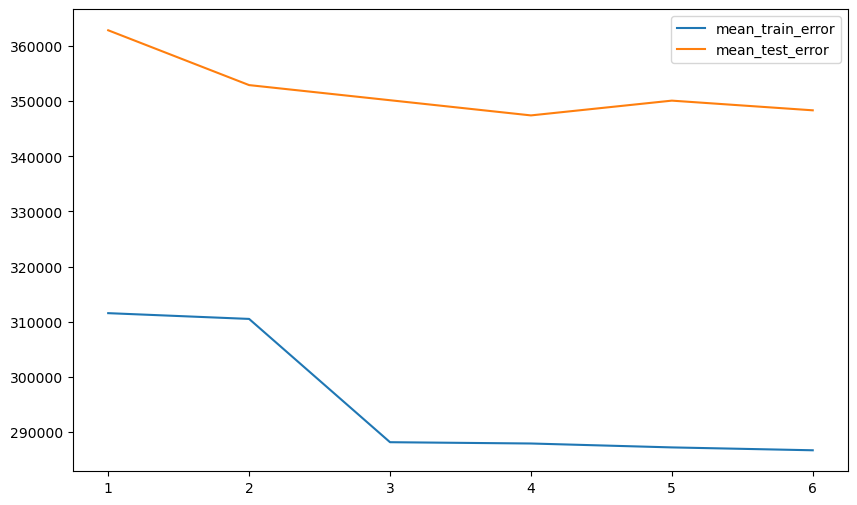

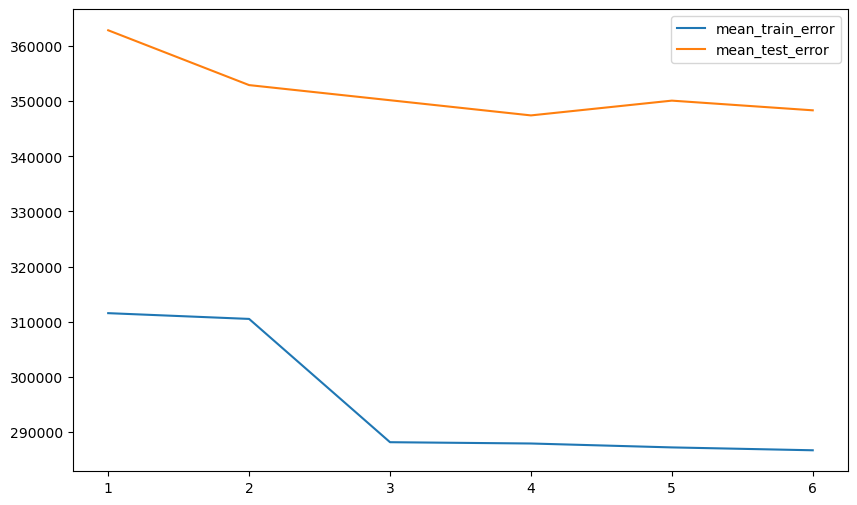

NameError: name 'X_train_CVL' is not defined

In [24]:
R2_prev_poly_PACA = reg_sk_poly(4,X_train_PACA,X_test_PACA,Y_train_PACA,Y_test_PACA)
R2_prev_poly_HDF = reg_sk_poly(4,X_train_HDF,X_test_HDF,Y_train_HDF,Y_test_HDF)
R2_prev_poly_CVL = reg_sk_poly(X_train_CVL,X_test_CVL,Y_train_CVL,Y_test_CVL)
R2_prev_poly_NA = reg_sk_poly(X_train_NA,X_test_NA,Y_train_NA,Y_test_NA)
R2_prev_poly_BFC = reg_sk_poly(X_train_BFC,X_test_BFC,Y_train_BFC,Y_test_BFC)
R2_prev_poly_Bretagne = reg_sk_poly(X_train_Bretagne,X_test_Bretagne,Y_train_Bretagne,Y_test_Bretagne)
R2_prev_poly_Occitanie = reg_sk_poly(X_train_Occitanie,X_test_Occitanie,Y_train_Occitanie,Y_test_Occitanie)
R2_prev_poly_Normandie = reg_sk_poly(X_train_Normandie,X_test_Normandie,Y_train_Normandie,Y_test_Normandie)
R2_prev_poly_ARA = reg_sk_poly(X_train_ARA,X_test_ARA,Y_train_ARA,Y_test_ARA)
R2_prev_poly_GE = reg_sk_poly(X_train_GE,X_test_GE,Y_train_GE,Y_test_GE)
R2_prev_poly_PDL = reg_sk_poly(X_train_PDL,X_test_PDL,Y_train_PDL,Y_test_PDL)

La régression d'ordre 4 semble la plus adaptée.

In [69]:
liste_R2 = [R2_IDF,R2_PACA,R2_HDF]
liste_region = ['Île-de-France',"Provence-Alpes-Côte d'Azur",'Hauts-de-France']
d={'liste_region':liste_region,"R2":liste_R2}
R2_reg_poly = pd.DataFrame(d)
R2_reg_poly.sort_values("R2",ascending=False,inplace=True)
R2_reg_poly

,liste_region,R2
0,Île-de-France,0.631467
2,Hauts-de-France,0.623478
1,Provence-Alpes-Côte d'Azur,0.439669


## Régression par morceaux

### Calcul des seuils

In [72]:
def calcul_seuil(df_reg):
    
    X = df_reg[["tmoy_scaled"]].to_numpy()
    Y = df_reg[["conso_totale_moyenne"]].to_numpy()

    model = DecisionTreeRegressor(random_state=0, max_depth=2)
    model.fit(X,Y)

    ## On trie les seuils
    th = list(sorted(set(model.tree_.threshold)))
    th += [(th[i] + th[i-1])/2 for i in range(1,len(th))]
    th = list(sorted(th))
    return(th[-1])

In [73]:
seuil_IDF=calcul_seuil(enedis_IDF)
seuil_HDF=calcul_seuil(enedis_HDF)
seuil_PACA=calcul_seuil(enedis_PACA)

In [74]:
print("Seuil IDF: ")
print(seuil_IDF)

print("Seuil HDF: ")
print(seuil_HDF)

print("Seuil PACA: ")
print(seuil_PACA)



Seuil IDF: 
0.32509541511535645
Seuil HDF: 
0.15901421010494232
Seuil PACA: 
-0.2645804136991501


In [28]:
seuil_CVL=calcul_seuil(enedis_CVL)
seuil_Normandie=calcul_seuil(enedis_Normandie)
seuil_Occitanie=calcul_seuil(enedis_Occitanie)
seuil_ARA=calcul_seuil(enedis_ARA)
seuil_BFC=calcul_seuil(enedis_BFC)
seuil_NA=calcul_seuil(enedis_NA)
seuil_Bretagne=calcul_seuil(enedis_Bretagne)
seuil_GE=calcul_seuil(enedis_GE)
seuil_PDL=calcul_seuil(enedis_PDL)

NameError: name 'enedis_CVL' is not defined

### Regression linéaire par morceaux

In [75]:
def creation_df(df_region,seuil):

    ## Création des indicatrices
    Y = df_region["total_energie_soutiree_wh"].to_numpy()
    X = enedis_IDF["tmoy_scaled"].to_numpy()

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
    X_train_affiche=X_train
    X_test_affiche = X_test
    
    ## Indicatrice pour Train
    indicsupto_train= [ele if ele>seuil else 0 for ele in X_train]
    indicinfto_train= [ele if ele<=seuil else 0 for ele in X_train]

    ## Indicatrice pour Test
    indicsupto_test= [ele if ele>seuil else 0 for ele in X_test]
    indicinfto_test= [ele if ele<=seuil else 0 for ele in X_test]

    ##  Transformation en df pour l'échantillon train
    df_x1_train = pd.DataFrame(indicinfto_train, columns = ['Indicatrice < seuil'])
    df_x2_train = pd.DataFrame(indicsupto_train, columns = ['Indicatrice >= seuil'])

    X_train = pd.DataFrame(np.c_[df_x1_train["Indicatrice < seuil"],df_x2_train["Indicatrice >= seuil"]],columns = ["Indicatrice < seuil","Indicatrice >= seuil"])

    ##  Transformation en df pour l'échantillon test
    df_x1_test = pd.DataFrame(indicinfto_test, columns = ['Indicatrice < seuil'])
    df_x2_test = pd.DataFrame(indicsupto_test, columns = ['Indicatrice >= seuil'])

    X_test = pd.DataFrame(np.c_[df_x1_test["Indicatrice < seuil"],df_x2_test["Indicatrice >= seuil"]],columns = ["Indicatrice < seuil","Indicatrice >= seuil"])

    return(X_train,X_test,X_test_affiche,X_train_affiche,Y_train,Y_test)

In [76]:
X_train_IDF, X_test_IDF,X_test_affiche_IDF,X_train_affiche_IDF, Y_train_IDF, Y_test_IDF =creation_df(enedis_IDF,seuil_IDF)
X_train_PACA, X_test_PACA, X_test_affiche_PACA,X_train_affiche_PACA,Y_train_PACA, Y_test_PACA =creation_df(enedis_PACA,seuil_PACA)
X_train_HDF, X_test_HDF,X_test_affiche_HDF,X_train_affiche_HDF, Y_train_HDF, Y_test_HDF =creation_df(enedis_HDF,seuil_HDF)


KeyError: 'total_energie_soutiree_wh'

### Creation du modèle

In [39]:
def modele_regression(X_train,X_test,X_test_affiche,Y_train,Y_test,df_region,region):

    Y = df_region["total_energie_soutiree_wh"].to_numpy()
    #X_train_sm = sm.add_constant(X_train)
    model = sm.OLS(Y_train,X_train).fit()
    print_model = model.summary()
    print(print_model)

    lm = LinearRegression(fit_intercept=True) 
    lm.fit(X_train, Y_train) 
    Y_predicted = lm.predict(X_test)


    # Évaluation du modèle
    rmse = mean_squared_error(Y_test, Y_predicted)
    r2 = r2_score(Y_test, Y_predicted)
    # Affichage des valeurs
    print("Pente : " ,lm.coef_)
    print("Ordonnée à l'origine : ", lm.intercept_)
    print("Racine carrée de l'erreur quadratique moyenne : ", rmse)
    print('Score R2 : ', r2)
    
    # Tracée des valeurs
    # Points de données
    plt.scatter(enedis_IDF["tmoy_scaled"], Y, s=10)
    plt.xlabel('Température moyenne standardisée')
    plt.ylabel("Total d'energie soutiré en Méga Watt")
    plt.title("Regression par morceaux pour la région "+region)
    # Valeurs prédites
    plt.scatter(X_test_affiche, Y_predicted, color='r')
    plt.show()

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.682
Model:                            OLS   Adj. R-squared (uncentered):              0.680
Method:                 Least Squares   F-statistic:                              357.7
Date:                Tue, 04 Apr 2023   Prob (F-statistic):                    9.35e-84
Time:                        14:04:51   Log-Likelihood:                         -8041.1
No. Observations:                 336   AIC:                                  1.609e+04
Df Residuals:                     334   BIC:                                  1.609e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

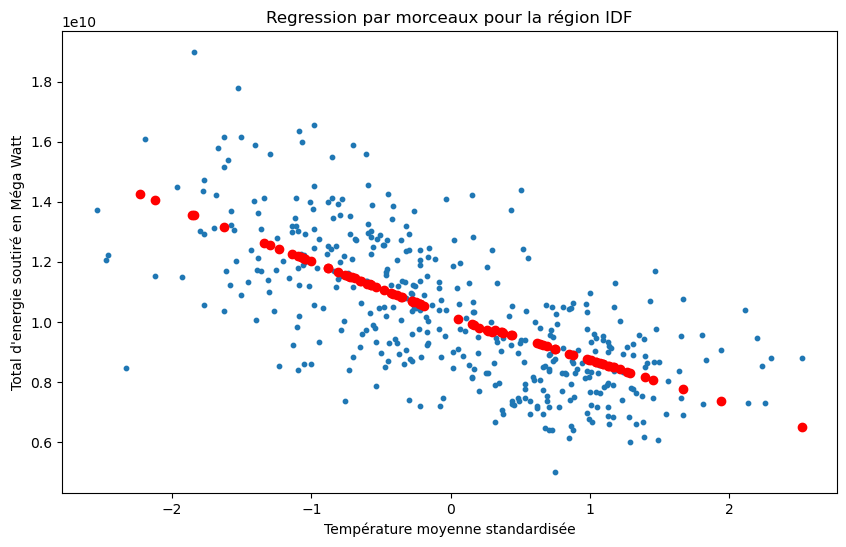

In [40]:
modele_regression(X_train_IDF,X_test_IDF,X_test_affiche_IDF,Y_train_IDF,Y_test_IDF,enedis_IDF,"IDF")


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.681
Model:                            OLS   Adj. R-squared (uncentered):              0.679
Method:                 Least Squares   F-statistic:                              355.8
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                    1.68e-83
Time:                        20:01:23   Log-Likelihood:                         -7723.1
No. Observations:                 336   AIC:                                  1.545e+04
Df Residuals:                     334   BIC:                                  1.546e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

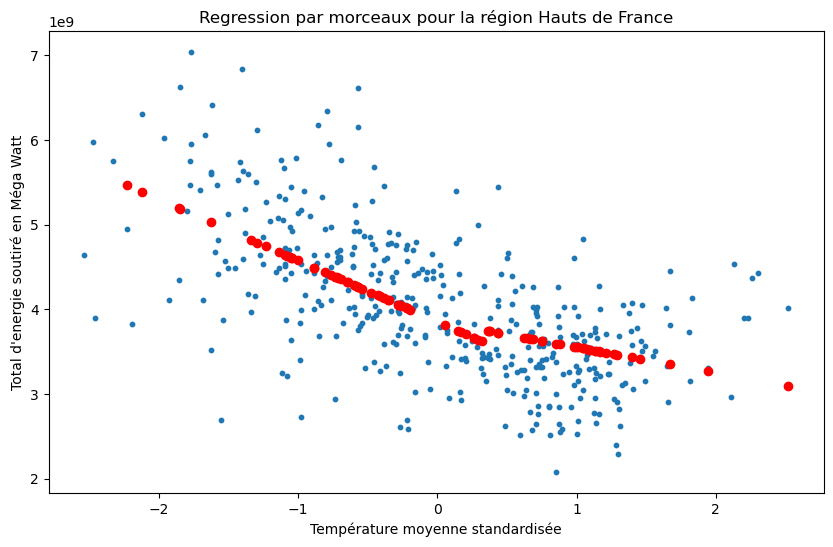

In [39]:
modele_regression(X_train_HDF,X_test_HDF,X_test_affiche_HDF,Y_train_HDF,Y_test_HDF,enedis_HDF,"Hauts de France")

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.750
Model:                            OLS   Adj. R-squared (uncentered):              0.749
Method:                 Least Squares   F-statistic:                              501.3
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                   2.62e-101
Time:                        20:01:26   Log-Likelihood:                         -7624.7
No. Observations:                 336   AIC:                                  1.525e+04
Df Residuals:                     334   BIC:                                  1.526e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

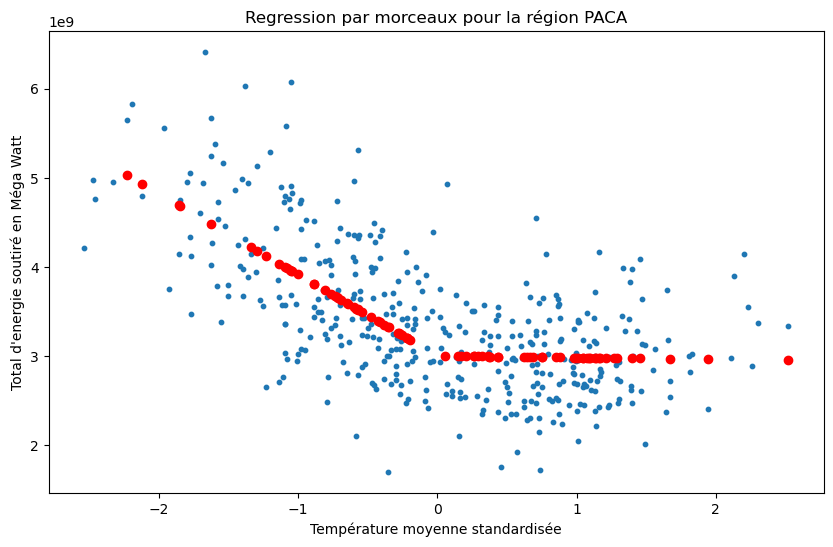

In [40]:
modele_regression(X_train_PACA,X_test_PACA,X_test_affiche_PACA,Y_train_PACA,Y_test_PACA,enedis_PACA,"PACA")